# Getting the Data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from pycaret.regression import *
%matplotlib inline

In [14]:
train = pd.read_csv(r"C:\Users\torju\Desktop\train.csv")
test = pd.read_csv(r"C:\Users\torju\Desktop\test.csv")

In [15]:
train.shape

(3000, 23)

In [16]:
test.shape

(4398, 22)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [18]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Let's change some things up!

# Visualizing Data

In [19]:
budget = train['budget']

In [20]:
budget

0       14000000
1       40000000
2        3300000
3        1200000
4              0
          ...   
2995           0
2996           0
2997    65000000
2998    42000000
2999    35000000
Name: budget, Length: 3000, dtype: int64

In [21]:
budget = train.sort_values('budget')

<AxesSubplot:title={'center':'Budget'}>

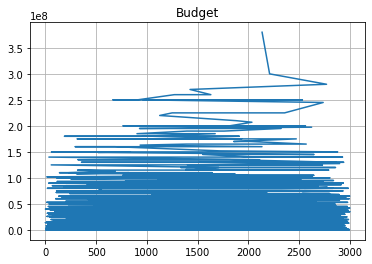

In [22]:
budget['budget'].plot(kind='line', grid=True, title='Budget')

# Screwing With the Data

In [23]:
train.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,NaN,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'c

## Removing Columns

Crew, tagline, imdb_id, poster_path, overview and original_title are all removed.

In [24]:
train = train.drop(['crew'], axis = 1)

In [25]:
train = train.drop(['tagline'], axis = 1)

In [26]:
train = train.drop(['imdb_id'], axis = 1)

In [27]:
train = train.drop(['poster_path'], axis = 1)

In [28]:
train = train.drop(['overview'], axis = 1)

In [29]:
train = train.drop(['original_title'], axis = 1)

In [30]:
train = train.drop(['Keywords'], axis = 1)

In [31]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
original_language           0
popularity                  0
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
title                       0
cast                       13
revenue                     0
dtype: int64

## Replacing NaN Values With 'unknown'

Because we are gonna work with text processing, we'll replace NaN values with 'unknown'.

Production companies:

In [32]:
train['production_companies'].loc[train['production_companies'].isnull()] = 'unknown'

Production countries:

In [33]:
train['production_countries'].loc[train['production_countries'].isnull()] = 'unknown'

Keywords:

In [34]:
# train['Keywords'].loc[train['Keywords'].isnull()] = 'unknown'

Cast:

In [35]:
train['cast'].loc[train['cast'].isnull()] = 'unknown'

Spoken languages:

In [36]:
train['spoken_languages'].loc[train['spoken_languages'].isnull()] = 'unknown'

Production companies:

In [37]:
train['production_companies'].loc[train['production_companies'].isnull()] = 'unknown'

Production countries:

In [38]:
train['production_countries'].loc[train['production_countries'].isnull()] = 'unknown'

In [39]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
original_language           0
popularity                  0
production_companies        0
production_countries        0
release_date                0
runtime                     2
spoken_languages            0
status                      0
title                       0
cast                        0
revenue                     0
dtype: int64

The remaining NaN values will be replaced with booleans, median or mean values.

## Changing Values to Numerical Categories

### Original Language

In [40]:
len(train.original_language.unique())

36

Seeing as we have too many categories for one-hot encoding, we'll just label encode them.

In [41]:
train['original_language'] = train['original_language'].astype('category')
train['original_language'] = train['original_language'].cat.codes
# train ['original_language'] = train['original_language'].astype(int)

In [42]:
train[['title', 'original_language']].head(10)

,title,original_language
0,Hot Tub Time Machine 2,7
1,The Princess Diaries 2: Royal Engagement,7
2,Whiplash,7
3,Kahaani,13
4,Marine Boy,18
5,Pinocchio and the Emperor of the Night,7
6,The Possession,7
7,Control Room,7
8,Muppet Treasure Island,7
9,A Mighty Wind,7


Good stuff! Each langauge corresponds to a number now.

### Genres

In [43]:
len(train.genres.unique())

873

Yikes, that's a lot of genres! Let's take a closer look at how the genre category is structured.

In [44]:
train[['title','genres']].head()

,title,genres
0,Hot Tub Time Machine 2,"[{'id': 35, 'name': 'Comedy'}]"
1,The Princess Diaries 2: Royal Engagement,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2,Whiplash,"[{'id': 18, 'name': 'Drama'}]"
3,Kahaani,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
4,Marine Boy,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."


It looks like the main category is the first to be listed, and that the genre object is a string. Assuming that the first is the main category, we could just cut out this part of the string and convert this to an integer.

In [45]:
train['genres'] = train['genres'].str[8:10]

In [46]:
train[['title','genres']].head()

,title,genres
0,Hot Tub Time Machine 2,35
1,The Princess Diaries 2: Royal Engagement,35
2,Whiplash,18
3,Kahaani,53
4,Marine Boy,28


In [47]:
train = train.replace(r'^\s*$', np.NaN, regex=True)
train['genres'].loc[train['genres'].isnull()] = -1

In [48]:
train['genres'] = train['genres'].astype(int)

In [49]:
len(train.genres.unique())

16

In [50]:
train.genres.unique()

array([35, 18, 53, 28, 16, 27, 99, 12, 80, 96, 14, 10, 87, 37, 36, -1])

Much better! Each category is represented by an integer, the films missing categories represented by -1.

### Production Companies

In [51]:
print("Unique production companies: " + str(len(train.production_companies.unique())))

Unique production companies: 2384


That's a lot of companies! We'll do the same for production companies, assume that the first company listed is the main one and sort them by that.

In [52]:
train[['title','production_companies']].head()

,title,production_companies
0,Hot Tub Time Machine 2,"[{'name': 'Paramount Pictures', 'id': 4}, {'na..."
1,The Princess Diaries 2: Royal Engagement,"[{'name': 'Walt Disney Pictures', 'id': 2}]"
2,Whiplash,"[{'name': 'Bold Films', 'id': 2266}, {'name': ..."
3,Kahaani,unknown
4,Marine Boy,unknown


Below is a function to cut out a substring containing the first production company.

In [53]:
def slice_prod_comp(s):
    if (s == 'unknown'):
        return s
    else:
        start = s.find("\'name': \'") + len("\'name': \'")
        end = s.find("',")
        return s[start:end]

In [54]:
train['production_companies'] = train['production_companies'].map(lambda s: slice_prod_comp(s))

In [55]:
train[['title','production_companies']].head()

,title,production_companies
0,Hot Tub Time Machine 2,Paramount Pictures
1,The Princess Diaries 2: Royal Engagement,Walt Disney Pictures
2,Whiplash,Bold Films
3,Kahaani,unknown
4,Marine Boy,unknown


Looking a lot cleaner. Let's see if this also reduced the amount of unique production companies.

In [56]:
print("Unique production companies: " + str(len(train.production_companies.unique())))

Unique production companies: 1064


That's a nice reduction. Now we will label them like before.

In [57]:
train['production_companies'] = train['production_companies'].astype('category')
train['production_companies'] = train['production_companies'].cat.codes

In [58]:
train[['title', 'production_companies']].head(10)

,title,production_companies
0,Hot Tub Time Machine 2,705
1,The Princess Diaries 2: Royal Engagement,1004
2,Whiplash,140
3,Kahaani,1054
4,Marine Boy,1054
5,Pinocchio and the Emperor of the Night,1054
6,The Possession,386
7,Control Room,1054
8,Muppet Treasure Island,1004
9,A Mighty Wind,182


Great job! Let's move on to production_countries.

### Production Countries

In [59]:
print("Unique production countries: " + str(len(train.production_countries.unique())))

Unique production countries: 322


In [60]:
train[['title', 'production_countries']].head(10)

,title,production_countries
0,Hot Tub Time Machine 2,"[{'iso_3166_1': 'US', 'name': 'United States o..."
1,The Princess Diaries 2: Royal Engagement,"[{'iso_3166_1': 'US', 'name': 'United States o..."
2,Whiplash,"[{'iso_3166_1': 'US', 'name': 'United States o..."
3,Kahaani,"[{'iso_3166_1': 'IN', 'name': 'India'}]"
4,Marine Boy,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]"
5,Pinocchio and the Emperor of the Night,unknown
6,The Possession,"[{'iso_3166_1': 'US', 'name': 'United States o..."
7,Control Room,unknown
8,Muppet Treasure Island,"[{'iso_3166_1': 'US', 'name': 'United States o..."
9,A Mighty Wind,"[{'iso_3166_1': 'US', 'name': 'United States o..."


In [61]:
train.production_countries.unique()

array(["[{'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'IN', 'name': 'India'}]",
       "[{'iso_3166_1': 'KR', 'name': 'South Korea'}]", 'unknown',
       "[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'CA', 'name': 'Canada'}]",
       "[{'iso_3166_1': 'RS', 'name': 'Serbia'}]",
       "[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",
       "[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",
       "[{'iso_3166_1': 'FR', 'name': 'France'}]",
       "[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}]",
       "[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'IE', 'name': 'Ireland'}]",
       "[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': '

In [62]:
def slice_prod_count(s):
    if (s == 'unknown'):
        return s
    else:
        start = s.find("[{\'iso_3166_1\': \'") + len("[{\'iso_3166_1\': \'")
        end = s.find("',")
        return s[start:end]

In [63]:
train['production_countries'] = train['production_countries'].map(lambda s: slice_prod_count(s))

In [64]:
train[['title','production_countries']].head()

,title,production_countries
0,Hot Tub Time Machine 2,US
1,The Princess Diaries 2: Royal Engagement,US
2,Whiplash,US
3,Kahaani,IN
4,Marine Boy,KR


In [65]:
print("Unique production countries: " + str(len(train.production_countries.unique())))

Unique production countries: 61


In [66]:
train['production_countries'] = train['production_countries'].astype('category')
train['production_countries'] = train['production_countries'].cat.codes

In [67]:
train[['title','production_countries']].head()

,title,production_countries
0,Hot Tub Time Machine 2,57
1,The Princess Diaries 2: Royal Engagement,57
2,Whiplash,57
3,Kahaani,28
4,Marine Boy,34


Donzo. Let's move on to spoken languages.

### Spoken Languages

In [68]:
len(train.spoken_languages.unique())

402

In [69]:
train.spoken_languages.unique()

array(["[{'iso_639_1': 'en', 'name': 'English'}]",
       "[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]",
       "[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",
       "[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso_639_1': 'en', 'name': 'English'}]",
       "[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'ru', 'name': 'Pусский'}]",
       "[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'sv', 'name': 'svenska'}]",
       "[{'iso_639_1': 'sr', 'name': 'Srpski'}]",
       "[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso_639_1': 'en', 'name': 'English'}]",
       "[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}, {'iso_639_1': 'it', 'name': 'Italiano'}]",
       "[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'ja', 'name': '日本語'}]",
       "[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",
       "[{'iso_639_1': 'fr', 'name': 'Français'}]",
       "[{'iso_639_1': 'ar', '

In [70]:
train['spoken_languages'] = train['spoken_languages'].apply(str)


In [71]:
train['spoken_languages'].head(10)

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
5             [{'iso_639_1': 'en', 'name': 'English'}]
6             [{'iso_639_1': 'en', 'name': 'English'}]
7    [{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...
8             [{'iso_639_1': 'en', 'name': 'English'}]
9             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

In [72]:
def slice_spoken_lang(s):
    if (s == 'unknown'):
        return s
    else:
        start = s.find("[{\'iso_639_1\': \'") + len("[{\'iso_639_1\': \'")
        end = s.find("',")
        return s[start:end]

In [73]:
train['spoken_languages'] = train['spoken_languages'].map(lambda s: slice_spoken_lang(s))

In [74]:
train['spoken_languages'].head(10)

0    en
1    en
2    en
3    en
4    ko
5    en
6    en
7    ar
8    en
9    en
Name: spoken_languages, dtype: object

In [75]:
train['spoken_languages'] = train['spoken_languages'].astype('category')
train['spoken_languages'] = train['spoken_languages'].cat.codes

In [76]:
train['spoken_languages'].head(10)

0    11
1    11
2    11
3    11
4    28
5    11
6    11
7     2
8    11
9    11
Name: spoken_languages, dtype: int8

### Keywords

In [77]:
# len(train.Keywords.unique())

### Cast

In [78]:
len(train.cast.unique())

2976

## Changing Values to Booleans

In [79]:
train['belongs_to_collection'].loc[~train['belongs_to_collection'].isnull()] = 1  # not nan
train['belongs_to_collection'].loc[train['belongs_to_collection'].isnull()] = 0   # nan

In [80]:
train['homepage'].loc[~train['homepage'].isnull()] = 1
train['homepage'].loc[train['homepage'].isnull()] = 0

In [81]:
train.replace(('Released', 'Rumored'), (1, 0), inplace = True)

## Replacing Missing Values With Median

In [82]:
(train['budget'] == 0).sum()

812

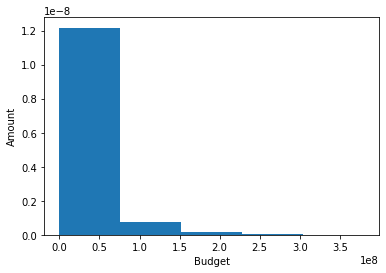

In [83]:
np.random.seed(42)
x = np.random.normal(size=1000)

plt.hist(train['budget'], density=True, bins=5)  # density=False would make counts
plt.ylabel('Amount')
plt.xlabel('Budget');

Seeing as we have a very skewed distribution, we are better off using the median rather than the mean.

In [84]:
median_budget = train['budget'].median(skipna=True)

In [85]:
train['budget'] = train.budget.mask(train.budget == 0, median_budget)

## Replacing Missing Values With Mean

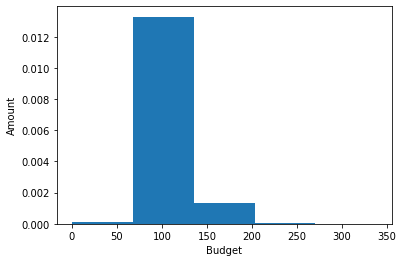

In [86]:
plt.hist(train['runtime'], density=True, bins=5)  # density=False would make counts
plt.ylabel('Amount')
plt.xlabel('Budget');

This distribution is much more equal, and as such we will use the mean to replace missing values.

In [87]:
mean_runtime = train['runtime'].mean(skipna=True)
print("Mean runtime: " + str(int(mean_runtime)) + " minutes.")

Mean runtime: 107 minutes.


In [88]:
train['runtime'].loc[train['runtime'].isnull()] = mean_runtime

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  3000 non-null   int64  
 2   budget                 3000 non-null   float64
 3   genres                 3000 non-null   int32  
 4   homepage               3000 non-null   int64  
 5   original_language      3000 non-null   int8   
 6   popularity             3000 non-null   float64
 7   production_companies   3000 non-null   int16  
 8   production_countries   3000 non-null   int8   
 9   release_date           3000 non-null   object 
 10  runtime                3000 non-null   float64
 11  spoken_languages       3000 non-null   int8   
 12  status                 3000 non-null   int64  
 13  title                  3000 non-null   object 
 14  cast                   3000 non-null   object 
 15  reve

### Dealing With Dates

In [92]:
train[['title', 'release_date']]

,title,release_date
0,Hot Tub Time Machine 2,2/20/15
1,The Princess Diaries 2: Royal Engagement,8/6/04
2,Whiplash,10/10/14
3,Kahaani,3/9/12
4,Marine Boy,2/5/09
...,...,...
2995,Chasers,4/22/94
2996,We Are the Best!,3/28/13
2997,The Long Kiss Goodnight,10/11/96
2998,Along Came Polly,1/16/04


To look closer at the date, we will use a function found on KDNuggets.

[https://www.kdnuggets.com/2018/03/feature-engineering-dates-fastai.html]

In [93]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [94]:
train.isna().sum()

id                       0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
original_language        0
popularity               0
production_companies     0
production_countries     0
release_date             0
runtime                  0
spoken_languages         0
status                   0
title                    0
cast                     0
revenue                  0
dtype: int64

In [95]:
train = train.drop(['cast'], axis = 1)

In [96]:
train.head(10)

,id,belongs_to_collection,budget,genres,homepage,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,revenue
0,1,1,14000000.0,35,0,7,6.575393,705,57,2/20/15,93.0,11,1,Hot Tub Time Machine 2,12314651
1,2,1,40000000.0,35,0,7,8.248895,1004,57,8/6/04,113.0,11,1,The Princess Diaries 2: Royal Engagement,95149435
2,3,0,3300000.0,18,1,7,64.299990,140,57,10/10/14,105.0,11,1,Whiplash,13092000
3,4,0,1200000.0,53,1,13,3.174936,1054,28,3/9/12,122.0,11,1,Kahaani,16000000
4,5,0,8000000.0,28,0,18,1.148070,1054,34,2/5/09,118.0,28,1,Marine Boy,3923970
5,6,0,8000000.0,16,0,7,0.743274,1054,60,8/6/87,83.0,11,1,Pinocchio and the Emperor of the Night,3261638
6,7,0,14000000.0,27,1,7,7.286477,386,57,8/30/12,92.0,11,1,The Possession,85446075
7,8,0,8000000.0,99,0,7,1.949044,1054,60,1/15/04,84.0,2,1,Control Room,2586511
8,9,1,8000000.0,28,0,7,6.902423,1004,57,2/16/96,100.0,11,1,Muppet Treasure Island,34327391
9,10,0,6000000.0,35,0,7,4.672036,182,57,4/16/03,91.0,11,1,A Mighty Wind,18750246


# PyCaret Stuff

## Setting up PyCaret environment

In [97]:
train_setup = setup(data = train,
                    target = 'revenue',
                    high_cardinality_features = ['genres', 'original_language', 'production_companies', 'production_countries', 'spoken_languages'],
                    fold_shuffle = True,
                    session_id = 69)

,Description,Value
0,session_id,69
1,Target,revenue
2,Original Data,"(3000, 15)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,True
8,High Cardinality Method,frequency
9,Transformed Train Set,"(2099, 2112)"


## Comparing Models

Certain models have been excluded, as they are scoring really poorly on our set.

In [ ]:
compare_models(exclude = ['lar', 'llar', 'par', 'ada', 'dt', 'huber', 'knn', 'br', 'lasso', 'omp', 'ridge', 'lr', 'en'])

IntProgress(value=0, description='Processing: ', max=34)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:13:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,37732045.3992,6375289498927583.0000,78196832.6406,0.6775,2.3068,8976.9211,5.3730
gbr,Gradient Boosting Regressor,40286023.0828,6657791580210272.0000,79475737.4083,0.6651,2.7488,25344.8889,2875.8530
et,Extra Trees Regressor,37559819.9418,6675484852988047.0000,80073054.7965,0.6514,2.2282,3889.1990,9.9170


### Random Forest Regressor

In [ ]:
rf = create_model('rf')

In [ ]:
tune_model(rf, choose_better = True)

### Cat Boost Regressor

In [ ]:
cat = create_model('catboost')

In [ ]:
tuned_cat = tune_model(cat, choose_better = True)

### Light Gradient Boosting Machine	

In [ ]:
lightgbm = create_model('lightgbm')

In [ ]:
tune_model(lightgbm, choose_better = True)